# Préparation des données et premiers calculs

# Corrigé

L'objectif de ce module est d'étudier l'algorithme des K Plus Proches Voisins, _K Nearest Neighbours_ en anglais ou _KNN_.

Cet algorithme de classification permet d'attribuer une catégorie à des données en s'appuyant sur d'autres données connues.

Avant d'étudier l'algorithme proprement dit nous allons voir comment :
* charger des données à partir de fichiers _csv_
* typer ces données
* traiter ces données
* calculer des distances

## I. Importation de données

Nous allons travailler avec le fichier ``all_time_415.csv`` qui contient les statistiques en carrière des 500 "meilleurs" joueurs de NBA (en fait seulement les 415 pour lesquelles les données sont complètes). Il est encodé en ``utf-8``.

Le fichier ``fonctions_utiles.py`` fourni dans ce dossier contient des fonctions permettant d'importer facilement ces données : 

1. Charger les données :

In [1]:
from fonctions_utiles import csv_vers_dict

joueurs = csv_vers_dict("all_time_415.csv", separateur=",")

In [2]:
# Affichage du premier joueur en vérification
joueurs[0]

{'ID': '1',
 'Player': 'Kareem Abdul-Jabbar',
 'GP': '1560',
 'MIN': '57446',
 'PTS': '38387',
 'FGM': '15837',
 'FGA': '28307',
 'FG%': '55.9',
 '3PM': '1',
 '3PA': '18',
 '3P%': '5.6',
 'FTM': '6712',
 'FTA': '9304',
 'FT%': '72.1',
 'OREB': '2975',
 'DREB': '9394',
 'REB': '17440',
 'AST': '5660',
 'STL': '1160',
 'BLK': '3189',
 'TOV': '2527',
 'eFG%': '55.9',
 'TS%': '59.2'}

On veut séparer les ``ID`` et les ``Noms`` des statistiques avec des listes.

2. Créer les listes ``noms`` et ``stats`` contenant les bonnes informations en complétant le code ci-dessous :

In [3]:
noms = []
stats = []
for joueur in joueurs :
    dico_noms = dict()
    dico_stats = dict()
    for cle in joueur :
        if cle in ['ID','Player'] :
            dico_noms[cle] = joueur[cle]
        else :
            dico_stats[cle] = joueur[cle]
    noms.append(dico_noms)
    stats.append(dico_stats)

In [4]:
# Affichage du premier joueur en vérification
noms[0]

{'ID': '1', 'Player': 'Kareem Abdul-Jabbar'}

In [5]:
# Affichage du premier joueur en vérification
stats[0]

{'GP': '1560',
 'MIN': '57446',
 'PTS': '38387',
 'FGM': '15837',
 'FGA': '28307',
 'FG%': '55.9',
 '3PM': '1',
 '3PA': '18',
 '3P%': '5.6',
 'FTM': '6712',
 'FTA': '9304',
 'FT%': '72.1',
 'OREB': '2975',
 'DREB': '9394',
 'REB': '17440',
 'AST': '5660',
 'STL': '1160',
 'BLK': '3189',
 'TOV': '2527',
 'eFG%': '55.9',
 'TS%': '59.2'}

3. Typer les donneées du tableau ``stats`` en convertissant toutes les stats en ``float`` :

In [6]:
for joueur in stats :
    for cle in joueur :
        joueur[cle] = float(joueur[cle])

In [7]:
stats[0]

{'GP': 1560.0,
 'MIN': 57446.0,
 'PTS': 38387.0,
 'FGM': 15837.0,
 'FGA': 28307.0,
 'FG%': 55.9,
 '3PM': 1.0,
 '3PA': 18.0,
 '3P%': 5.6,
 'FTM': 6712.0,
 'FTA': 9304.0,
 'FT%': 72.1,
 'OREB': 2975.0,
 'DREB': 9394.0,
 'REB': 17440.0,
 'AST': 5660.0,
 'STL': 1160.0,
 'BLK': 3189.0,
 'TOV': 2527.0,
 'eFG%': 55.9,
 'TS%': 59.2}

## II. Représentation des données

La bibliothèque Matplotlib va nous permettre de représenter les données. Nous allons de plus colorier les points en fonction de la valeur d'une colonne (voir la [doc](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.scatter.html)):

In [54]:
matchs = [joueur['GP'] for joueur in stats]
points = [joueur['PTS'] for joueur in stats]
passes = [joueur['AST'] for joueur in stats]

Text(0, 0.5, 'Passes décisives')

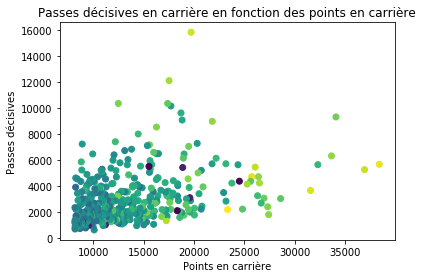

In [55]:
import matplotlib.pyplot as plt

plt.scatter(points,passes, c=matchs)

plt.title("Passes décisives en carrière en fonction des points en carrière")
plt.xlabel("Points en carrière")
plt.ylabel("Passes décisives")

1. Représenter de la même façon les pourcentages de réussite :
    * à 2 points en abscisses
    * à 3 points en ordonnées
    * au lancers-francs en couleur

Text(0, 0.5, '% à 3 points')

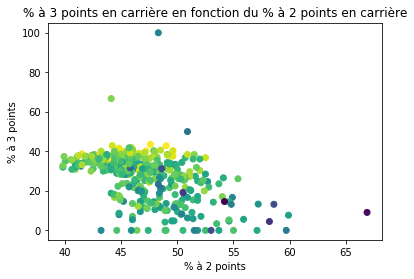

In [10]:
pct_2 = [joueur['FG%'] for joueur in stats]
pct_3 = [joueur['3P%'] for joueur in stats]
pct_FT = [joueur['FT%'] for joueur in stats]

plt.scatter(pct_2,pct_3, c=pct_FT)
plt.title("% à 3 points en carrière en fonction du % à 2 points en carrière")
plt.xlabel("% à 2 points")
plt.ylabel("% à 3 points")

## III. Calcul des distances

L'un des points centraux de l'algorithme _KNN_ est le calcul de la distance entre deux "points".

Nous avons ici des données à 21 dimensions. Nous allons écrire une fonction permettant de calculer la distance _euclidienne_ entre des "points" de même dimension.

Pour rappel, la distance "euclidienne" entre deux points $A$ et $B$ vaut :

$$AB = \sqrt{(x_A-x_B)^2+\cdots+(z_B-z_B)^2}$$

Notez qu'il existe beaucoup de distances autres que cette distance de base (voir [cet article](https://arxiv.org/pdf/1708.04321.pdf) par exemple).

1. Coder cette fonction ``distance`` :

In [11]:
from math import sqrt

def distance(point1, point2) :
    """
    Calcule la distance euclidienne entre les deux points fournis en argument
    point1 et point2 sont des points de N coordonnées fournis sous forme de dictionnaires
    Retourne la distance
    """
    
    assert len(point1) == len(point2), "Les deux points doivent avoir les mêmes dimensions"
    
    dimension = len(point1)
    somme_carré = 0
    
    for cle in point1 :
        somme_carré += (point1[cle] - point2[cle])**2
    
    return sqrt(somme_carré)

Pour finir, nous allons extraire un joueur de notre liste (le premier par exemple)...

In [12]:
origine = stats[0]

In [13]:
origine

{'GP': 1560.0,
 'MIN': 57446.0,
 'PTS': 38387.0,
 'FGM': 15837.0,
 'FGA': 28307.0,
 'FG%': 55.9,
 '3PM': 1.0,
 '3PA': 18.0,
 '3P%': 5.6,
 'FTM': 6712.0,
 'FTA': 9304.0,
 'FT%': 72.1,
 'OREB': 2975.0,
 'DREB': 9394.0,
 'REB': 17440.0,
 'AST': 5660.0,
 'STL': 1160.0,
 'BLK': 3189.0,
 'TOV': 2527.0,
 'eFG%': 55.9,
 'TS%': 59.2}

... et nous allons calculer à quelle distance il se trouve de chacun des autres joueurs. Les résultats seront stockés dans une liste ``distances_origine`` sous forme d'un couple ``(ID du joueur, Distance à l'origine)``.

2. Créer cette liste ``distances_origine``. On pourra utiliser une liste par compréhension :

In [14]:
distances_origine = [(ID, distance(joueur, origine)) for ID, joueur in zip(range(1,415), stats[1:])]

In [15]:
distances_origine

[(1, 7932.350988200156),
 (2, 15895.2157236069),
 (3, 17126.717847270094),
 (4, 21984.490330685403),
 (5, 14294.072728932086),
 (6, 21650.18950286579),
 (7, 20928.226852029296),
 (8, 15586.820580541755),
 (9, 20352.8248022234),
 (10, 27349.04288453254),
 (11, 18743.130194287187),
 (12, 23764.737895041046),
 (13, 26645.9106235835),
 (14, 17569.057603924008),
 (15, 24008.684171774177),
 (16, 28283.352208322125),
 (17, 26922.17767250636),
 (18, 25324.22222675358),
 (19, 27149.510142726333),
 (20, 31438.78318430915),
 (21, 28259.42163615526),
 (22, 23555.16848697967),
 (23, 34745.56664971806),
 (24, 32812.78566138511),
 (25, 36503.067317007764),
 (26, 31665.506789407304),
 (27, 27856.504949293263),
 (28, 33109.68601527354),
 (29, 29213.838761278872),
 (30, 34372.4028870546),
 (31, 41591.39861642068),
 (32, 42056.90148239644),
 (33, 36863.482587785984),
 (34, 30840.46489565292),
 (35, 38336.952491949596),
 (36, 35881.66117489546),
 (37, 33011.34029541969),
 (38, 33131.1476966917),
 (39, 400

## Normalisation des données (pas forcément avec les élèves !)

Les plus matheux d'entre nous tiquent peut-être sur les valeurs des données... Traiter dans une même formule le nombre de matchs joués (de l'ordre de $1000$) et le nombre de contres par matchs (moins de $10$) peut poser problème.

Pour s'abstraire de ce souci, nous allons centrer et réduire les données en faisant :

$$Nouvelle\,Donnée = \frac{Donnée - Moyenne}{Ecart-type}$$

![Normalisation](original-zeroed-normalized.jpeg)

La bibliothèque ``statistics`` de python va nous permettre de calculer facilement la moyenne (``mean``) et l'écart-type (``stdev``) :

In [56]:
from statistics import mean, stdev

dico_means = {cle : 0 for cle in stats[0]}
dico_stds = {cle : 0 for cle in stats[0]}

# Calculs des moyennes et écart-types
for cle in stats[0] :
    vals = [joueur[cle] for joueur in stats]
    dico_means[cle] = mean(vals)
    dico_stds[cle] = stdev(vals)

In [57]:
# Vérification
dico_means

{'GP': 877.8915662650602,
 'MIN': 27616.07951807229,
 'PTS': 13549.306024096386,
 'FGM': 5128.896385542169,
 'FGA': 10896.349397590362,
 'FG%': 46.99156626506024,
 '3PM': 557.3518072289156,
 '3PA': 1567.5036144578314,
 '3P%': 28.260963855421686,
 'FTM': 2734.1614457831324,
 'FTA': 3530.7036144578315,
 'FT%': 77.73156626506024,
 'OREB': 1339.9542168674698,
 'DREB': 3470.409638554217,
 'REB': 4958.522891566265,
 'AST': 2980.371084337349,
 'STL': 937.0771084337349,
 'BLK': 545.4072289156627,
 'TOV': 1742.8072289156626,
 'eFG%': 49.643614457831326,
 'TS%': 54.33566265060241}

1. Créer une nouvelle liste ``stats_norm`` en remplaçant chaque valeur de ``stats`` par sa valeur centrée :

In [18]:
stats_norm = []

for joueur in stats :
    dico = dict()
    for cle in joueur :
        dico[cle] = (joueur[cle] - dico_means[cle])/dico_stds[cle]
    stats_norm.append(dico)

2. Représenter le nombre de points marqués en fonction du pourcentage de réussite à 2 points avec les données de base puis avec les données normées afin d'observer la différence. On complètera le code ci-dessous :

Text(0.5, 1.0, 'PDonnées normalisées')

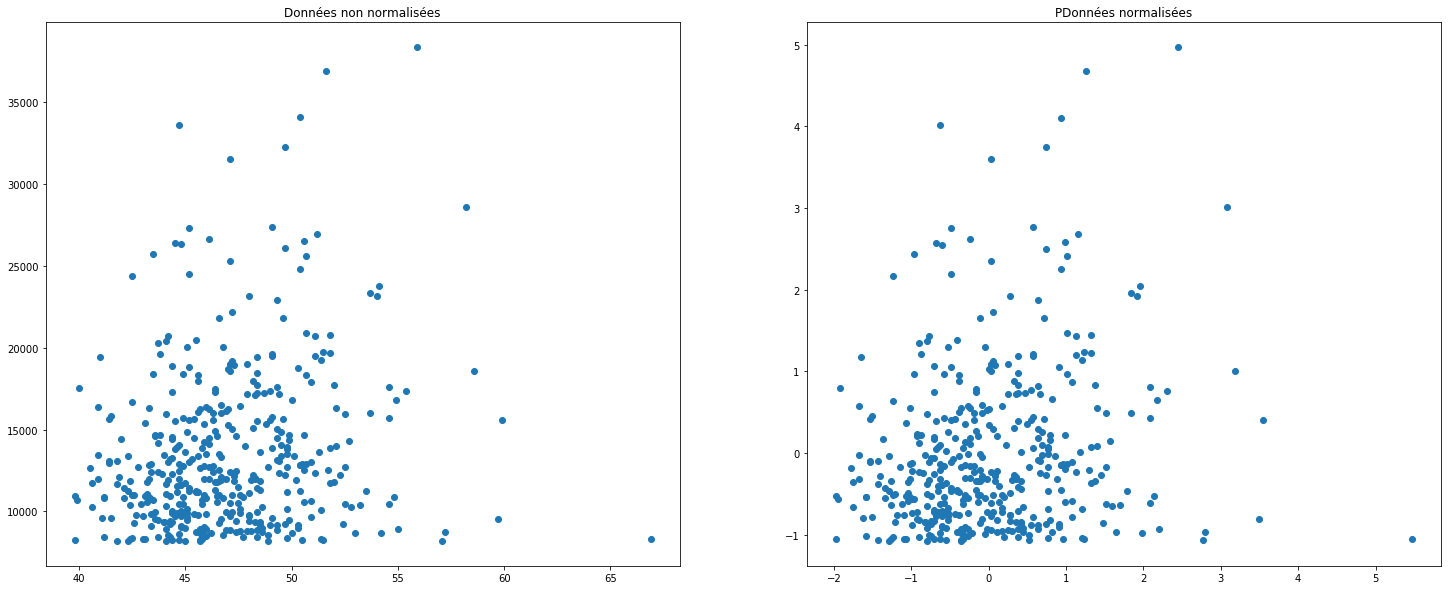

In [71]:
import matplotlib.pyplot as plt

# Données non normalisées
points = [joueur['PTS'] for joueur in stats]
pct_2 = [joueur['FG%'] for joueur in stats]

# Données normalisées
points_n = [joueur['PTS'] for joueur in stats_norm]
pct_2_n = [joueur['FG%'] for joueur in stats_norm]

# Le graphique
fig, axs = plt.subplots(1, 2, figsize=(25, 10))
axs[0].scatter(pct_2,points)
axs[0].set_title("Données non normalisées")

axs[1].scatter(pct_2_n,points_n)
axs[1].set_title("PDonnées normalisées")


L'effet n'est pas flagrant !

Pour mieux sentir l'effet de la normalisation nous allons construire des données à deux dimensions : une de faible étendue (entre $-1$ et $1$) et l'autre s'étalant entre $-100\,000$ et $100\,000$.

Puis nous afficherons ces valeurs dans un graphe en colorant les points selon leur distance au point moyen dans le cas de données non normalisées et de données normalisées.

In [60]:
from random import random

# Création des 1000 points
points = [{'x' : 2*random()-1, 'y' : 200_000*random() - 100_000} for k in range(1000)]

# Leurs abscisses
xs = [ point['x'] for point in points]
# Leurs coordonnées
ys = [ point['y'] for point in points]

# Les moyennes et écarts-types
x_mean = mean(xs)
x_std = stdev(xs)
y_mean = mean(ys)
y_std = stdev(ys)

# Les points normalisés
points_n = [{'x' : (point['x']-x_mean)/x_std, 'y' : (point['y']-y_mean)/y_std} for point in points]
# Leurs abscisses
xs_n = [ point['x'] for point in points_n]
# Leurs coordonnées
ys_n = [ point['y'] for point in points_n]

In [61]:
# Les distances
point_moyen = {'x' : x_mean, 'y' : y_mean}
point_moyen_n = {'x' : 0, 'y' : 0}

distances = [-distance(point, point_moyen) for point in points]
distances_n = [-distance(point, point_moyen_n) for point in points_n]
# Le - permet simplement d'avoir une représentatino graphique plus intuitive (points clairs proches)

Text(0.5, 1.0, 'Données normalisées')

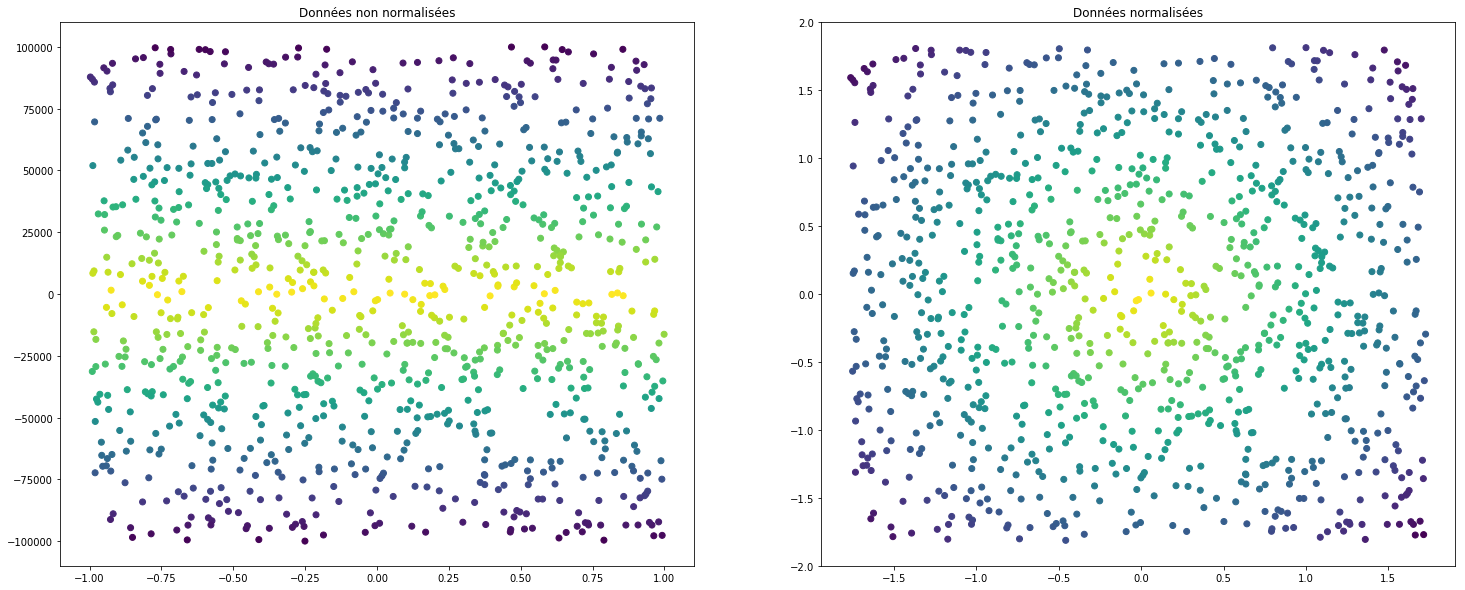

In [70]:
# Les graphiques

fig, axs = plt.subplots(1, 2, figsize=(25, 10))
axs[0].scatter(xs, ys, c = distances)
axs[0].set_title('Données non normalisées')
axs[1].scatter(xs_n, ys_n, c = distances_n)
axs[1].set_title('Données normalisées')

On voit bien ici que dans le premier cas, les points les plus proches du point moyen sont proches des abscisses (de $y = 0$) alors que dans le second cas on a un _disque_.